# Entregable Estadística FIFA

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import seaborn as sns
import statistics
import scipy.stats

### Leer CSV

In [2]:
df = pd.read_csv("Fifa_23_Players_Data.csv")

In [3]:
df_limpio = df.drop(['Known As', 'Positions Played', 'Image Link', 'Club Position', 'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan', 'Weak Foot Rating', 'International Reputation', 'National Team Name', 'National Team Image Link', 'National Team Position' ], axis=1)
df_limpio

,Full Name,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,Lionel Messi,91,91,54000000,CAM,Argentina,35,169,67,2190,...,91,88,91,67,66,67,62,53,62,22
1,Karim Benzema,91,91,64000000,CF,France,34,185,81,2147,...,89,84,89,67,67,67,63,58,63,21
2,Robert Lewandowski,91,91,84000000,ST,Poland,33,185,81,2205,...,86,83,86,67,69,67,64,63,64,22
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,...,91,91,91,82,82,82,78,72,78,24
4,Kylian Mbappé,91,95,190500000,ST,France,23,182,73,2177,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,Darren Collins,47,56,110000,CAM,Republic of Ireland,21,174,68,1287,...,50,44,50,41,38,41,40,36,40,15
18535,Dejiang Yang,47,57,90000,CDM,China PR,17,175,60,1289,...,45,45,45,47,48,47,49,49,49,15
18536,Liam Mullan,47,67,130000,RM,Northern Ireland,18,170,65,1333,...,52,49,52,46,44,46,46,42,46,17
18537,Daithí McCallion,47,61,100000,CB,Republic of Ireland,17,178,65,1113,...,33,33,33,44,42,44,47,49,47,15


In [4]:
#df_france = pd.DataFrame(df[df['Nationality'].str.contains('France')])
#df_spain = pd.DataFrame(df[df['Nationality'].str.contains('Spain')])
df_england = pd.DataFrame(df[df['Nationality'].str.contains('England')])
df_germany = pd.DataFrame(df[df['Nationality'].str.contains('Germany')])

### Porcentaje de jugadores por posición

In [5]:
tab = pd.crosstab(index=df['Best Position'], columns='count')

porcentajes = (tab/tab.sum())*100
df_porc = porcentajes.sort_values(by='count', ascending=False)

df_porc

col_0,count
Best Position,
CB,19.731377
ST,13.835698
CAM,12.465613
GK,11.117104
RM,7.783591
CDM,7.567830
CM,5.955014
RB,4.989482
LB,4.660446


## Porcentaje de nacionalidades más repetidas

In [6]:
tab = pd.crosstab(index=df['Nationality'], columns='count')

porcentajes = (tab/tab.sum())*100
df_porc = porcentajes.sort_values(by='count', ascending=False)

df_porc

col_0,count
Nationality,
England,8.803064
Germany,6.494417
Spain,5.793193
France,5.194455
Argentina,5.054210
...,...
Liechtenstein,0.005394
Mauritius,0.005394
Palestine,0.005394


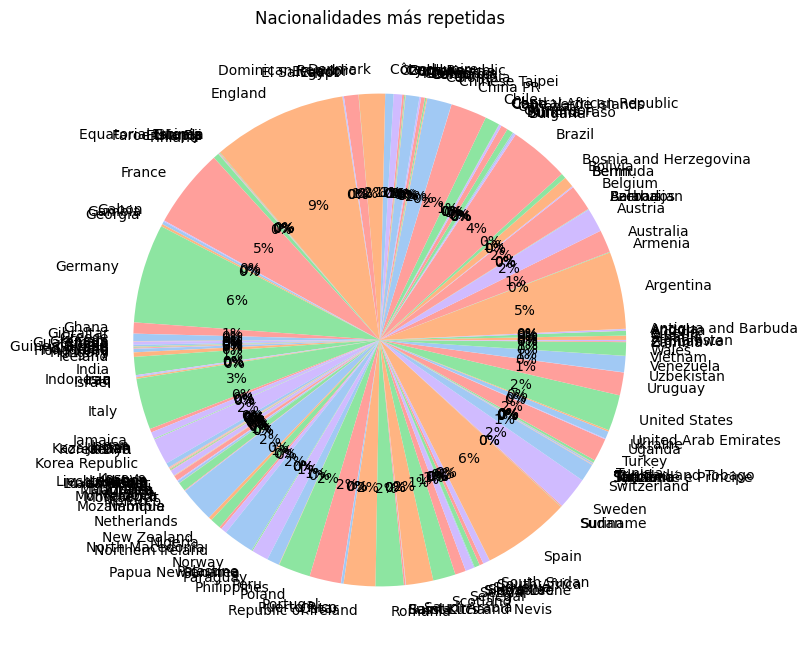

In [7]:
#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Nacionalidades más repetidas')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

### Histograma

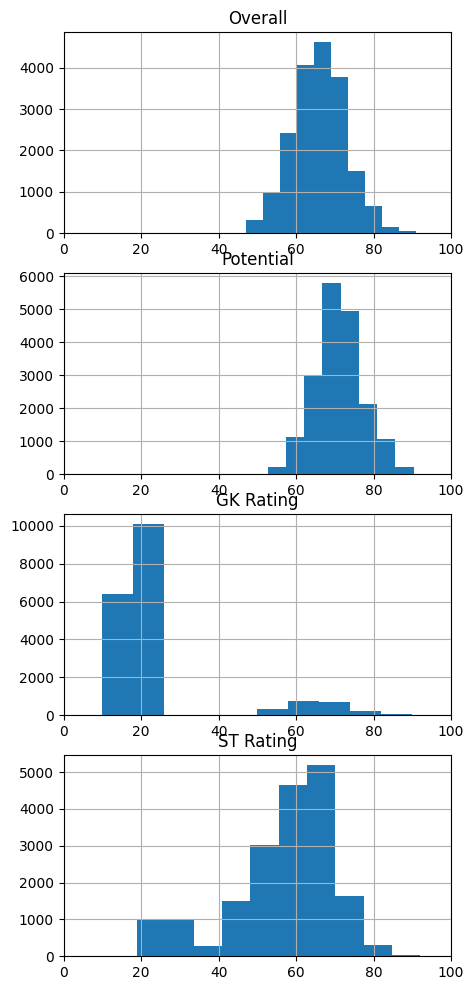

In [8]:
scores0 = ["Overall", "Potential", "GK Rating", "ST Rating"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores0):
    fig.add_subplot(4, 1, i+1)
    ax = df[sc].plot(kind='hist')
    ax.set_xlim([0, 100])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()

### Densidad

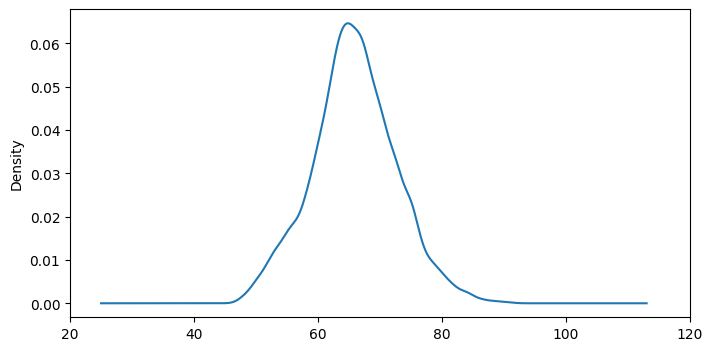

In [12]:
df["Overall"].plot(kind="density",  # Create density plot
                      figsize=(8,4),    # Set figure size
                      xlim= (20,120));  

### Describe

In [13]:
df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


### Boxplot

<Axes: >

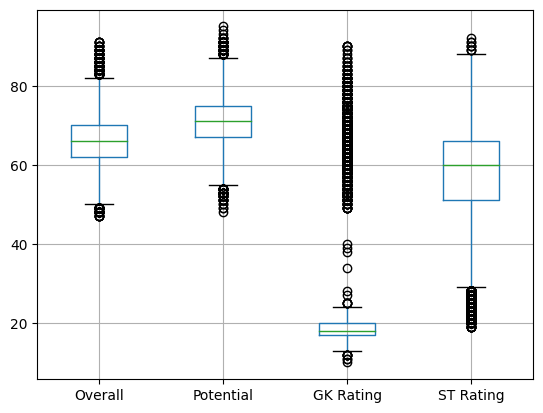

In [14]:
df.boxplot(column=scores0)

### Top 5

In [15]:
mejores_df = df_limpio.sort_values('TotalStats', ascending=False).head(5)

mejores_df

,Full Name,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
41,Leon Goretzka,87,88,91000000,CM,Germany,27,189,82,2312,...,86,88,86,85,87,85,85,86,85,22
53,Bruno Miguel Borges Fernandes,86,86,72500000,CAM,Portugal,27,179,69,2305,...,86,86,86,81,82,81,79,74,79,24
3,Kevin De Bruyne,91,91,107500000,CM,Belgium,31,181,70,2303,...,91,91,91,82,82,82,78,72,78,24
77,Marcos Acuña,85,85,46500000,LB,Argentina,30,172,69,2303,...,85,85,85,85,85,85,85,82,85,22
58,Nicolò Barella,86,89,89500000,CM,Italy,25,172,68,2296,...,86,88,86,86,87,86,85,81,85,22


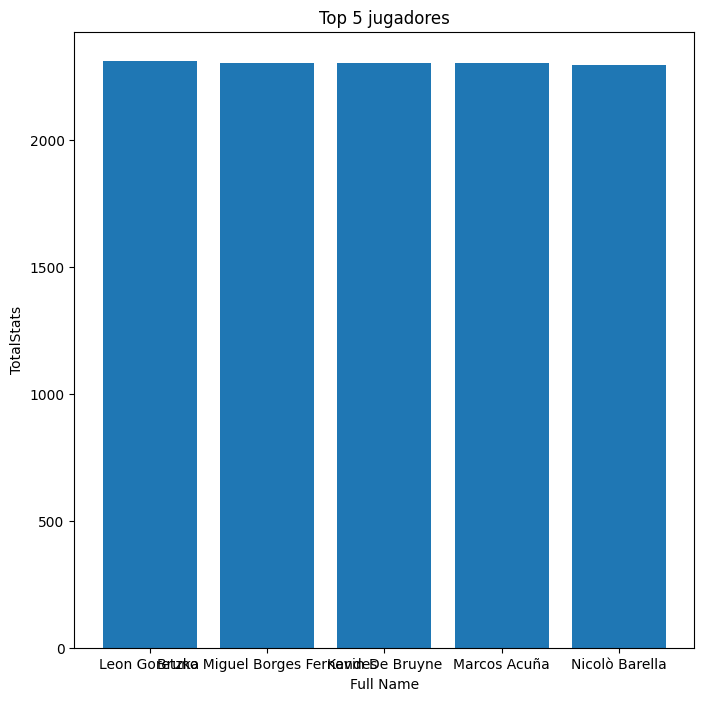

In [16]:
plt.figure(figsize=(8,8))

plt.bar(mejores_df['Full Name'],mejores_df['TotalStats'])
plt.xlabel('Full Name')
plt.ylabel('TotalStats')
plt.title('Top 5 jugadores')
plt.show()

### Scatter plot

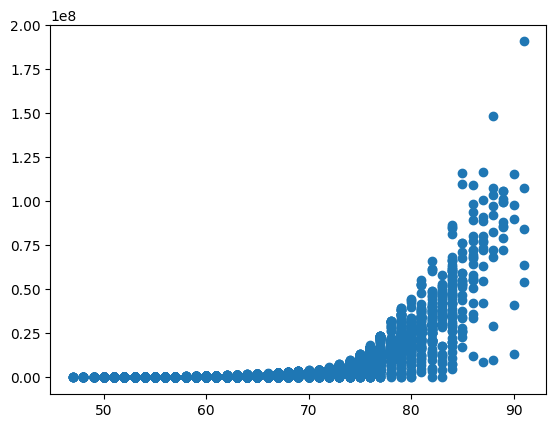

In [17]:
from numpy.lib.function_base import corrcoef
df_plv = plt.scatter(df["Overall"], df["Value(in Euro)"])
df_plv

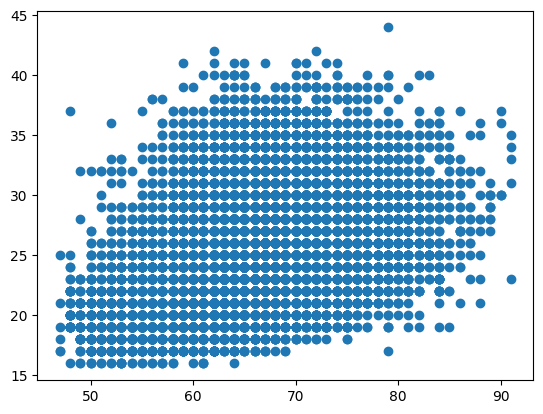

In [18]:
df_pla = plt.scatter(df["Overall"], df["Age"])
df_pla

### Correlación

In [19]:
# Matriz de correlación
# ==============================================================================
corr_matrix = df.corr(method='pearson')
corr_matrix

C:\Users\dario\AppData\Local\Temp\ipykernel_10776\2352506783.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='pearson')


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
Overall,1.000000,0.660630,0.561642,0.442369,0.033137,0.131420,0.608002,0.843720,0.599129,0.531458,...,0.472606,0.541536,0.472606,0.451583,0.479747,0.451583,0.428254,0.400783,0.428254,0.044462
Potential,0.660630,1.000000,0.532835,-0.263686,0.017489,-0.003973,0.372469,0.526546,0.497392,0.509867,...,0.348049,0.370327,0.348049,0.291078,0.294840,0.291078,0.270494,0.227643,0.270494,-0.002057
Value(in Euro),0.561642,0.532835,1.000000,0.030662,0.008028,0.027106,0.341551,0.468076,0.822262,0.976244,...,0.295886,0.321575,0.295886,0.252712,0.259591,0.252712,0.234933,0.202809,0.234933,0.011339
Age,0.442369,-0.263686,0.030662,1.000000,0.066684,0.217895,0.246279,0.381901,0.144251,0.025078,...,0.091072,0.166533,0.091072,0.141274,0.193036,0.141274,0.142184,0.183151,0.142184,0.132966
Height(in cm),0.033137,0.017489,0.008028,0.066684,1.000000,0.754845,-0.382480,-0.123239,0.025430,0.006404,...,-0.464597,-0.387355,-0.464597,-0.321388,-0.212100,-0.321388,-0.271875,-0.088695,-0.271875,0.369929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RWB Rating,0.451583,0.291078,0.252712,0.141274,-0.321388,-0.257192,0.885559,0.470957,0.271175,0.238489,...,0.819394,0.896510,0.819394,1.000000,0.977241,1.000000,0.993319,0.927139,0.993319,-0.744169
LB Rating,0.428254,0.270494,0.234933,0.142184,-0.271875,-0.215549,0.840970,0.433111,0.253928,0.222359,...,0.755647,0.849648,0.755647,0.993319,0.984470,0.993319,1.000000,0.959383,1.000000,-0.724081
CB Rating,0.400783,0.227643,0.202809,0.183151,-0.088695,-0.044569,0.720341,0.353803,0.229538,0.192411,...,0.584842,0.725680,0.584842,0.927139,0.967690,0.927139,0.959383,1.000000,0.959383,-0.635901
RB Rating,0.428254,0.270494,0.234933,0.142184,-0.271875,-0.215549,0.840970,0.433111,0.253928,0.222359,...,0.755647,0.849648,0.755647,0.993319,0.984470,0.993319,1.000000,0.959383,1.000000,-0.724081


<Axes: xlabel='Nationality', ylabel='Value(in Euro)'>

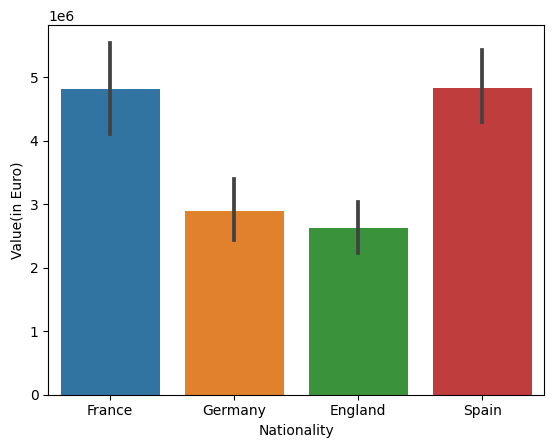

In [47]:
nacionalidades_filtradas = ['Spain', 'England', 'Germany', 'France']
df_filtrado = df[df['Nationality'].isin(nacionalidades_filtradas)]
sns.barplot(data=df_filtrado, x="Nationality", y="Value(in Euro)")

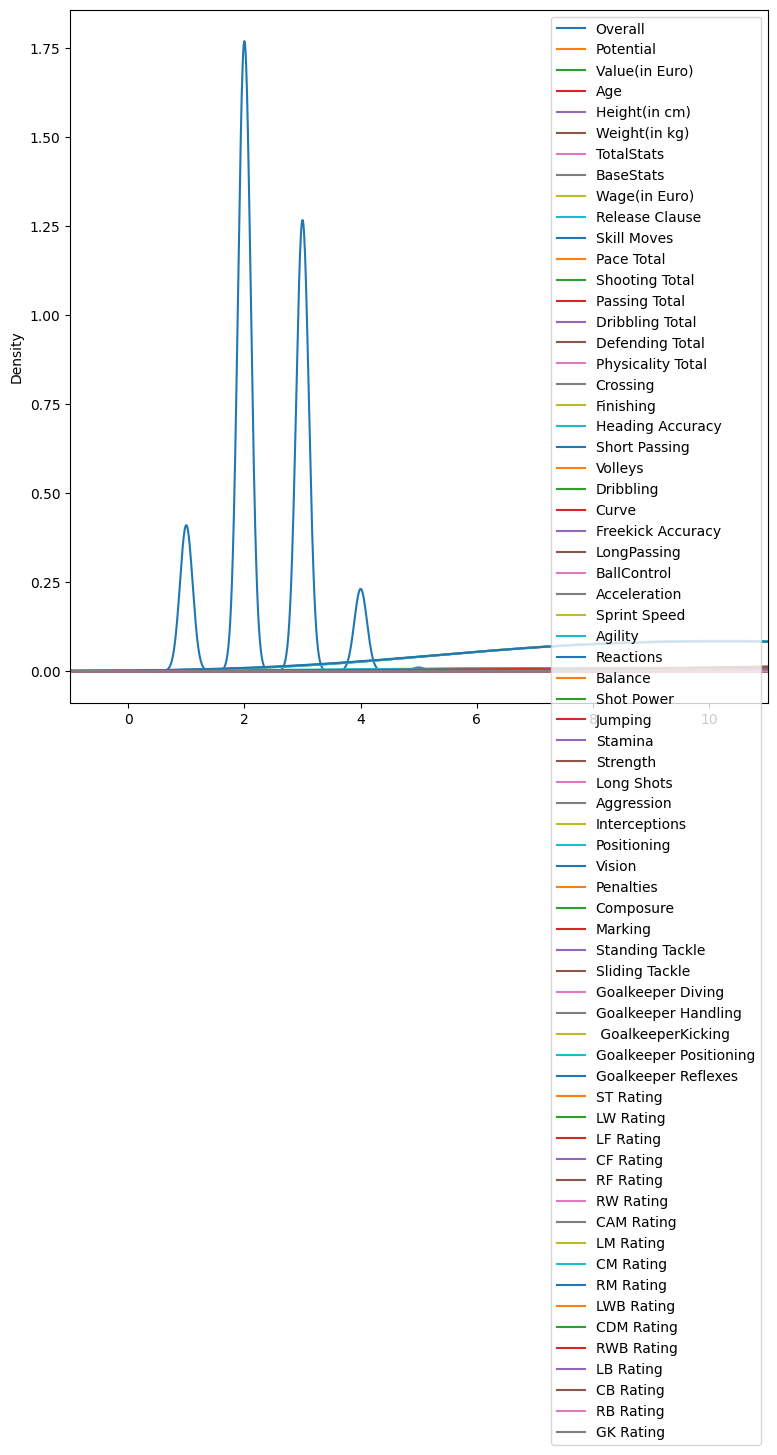

In [22]:
pd.DataFrame(df_limpio).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

# Análisis de normalidad

## Histograma

<Axes: ylabel='Density'>

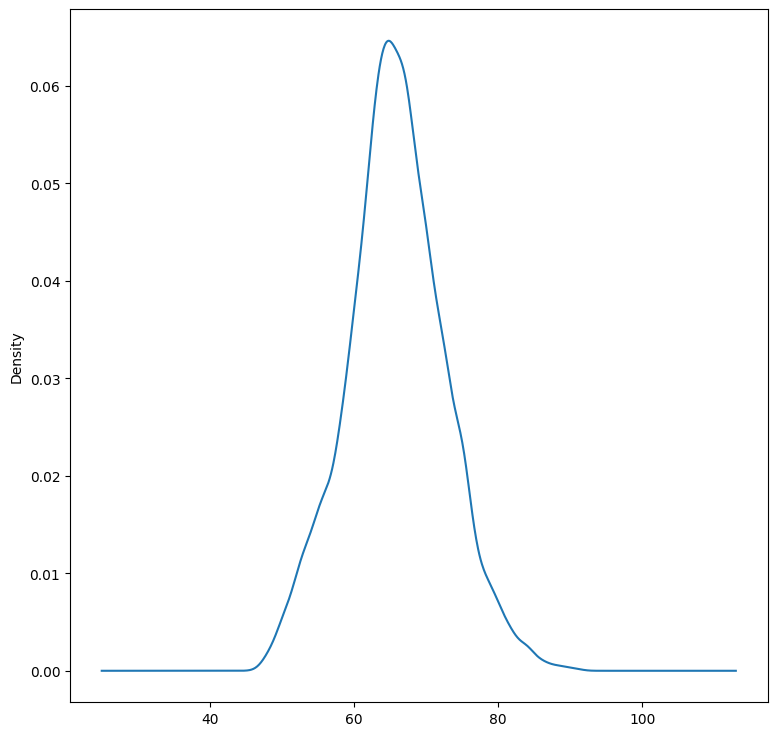

In [23]:
df_limpio['Overall'].plot(kind = "density", figsize = (9,9))

## BoxPlot

<Axes: >

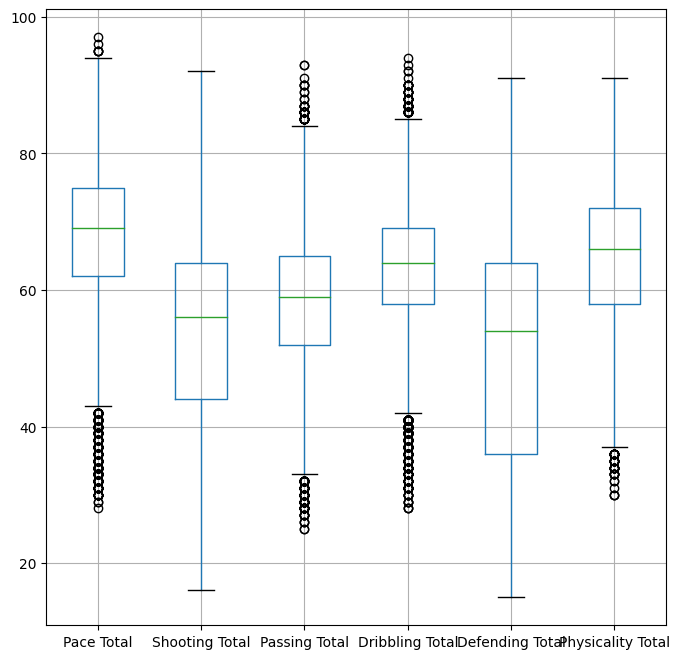

In [24]:
plt.figure(figsize=(8,8))
df_limpio.boxplot(column=["Pace Total", "Shooting Total","Passing Total","Dribbling Total","Defending Total","Physicality Total"])

## Describe

In [25]:
df_limpio.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


## QQ Plot

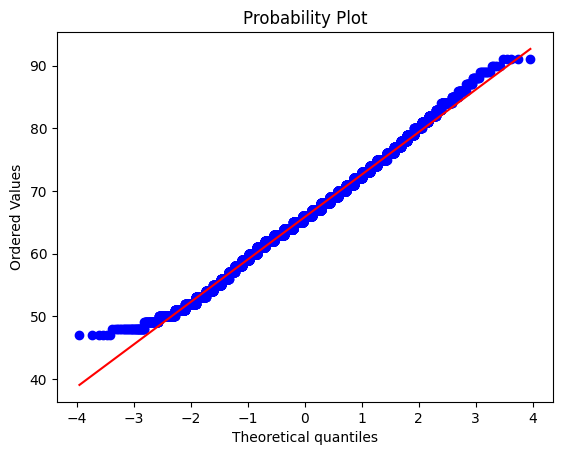

In [26]:
scipy.stats.probplot(df_limpio['Overall'], dist="norm", plot=plt)
plt.show()

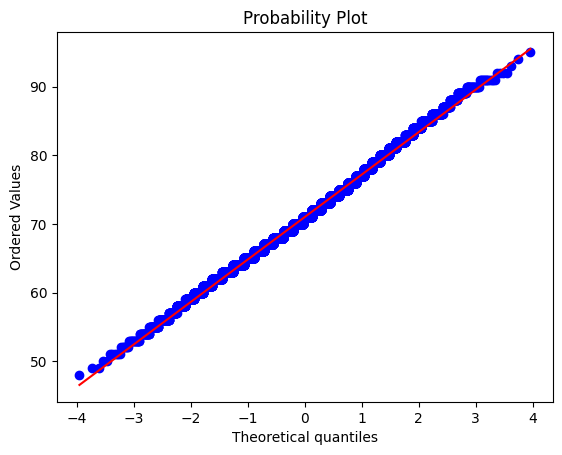

In [27]:
scipy.stats.probplot(df_limpio['Potential'], dist="norm", plot=plt)
plt.show()

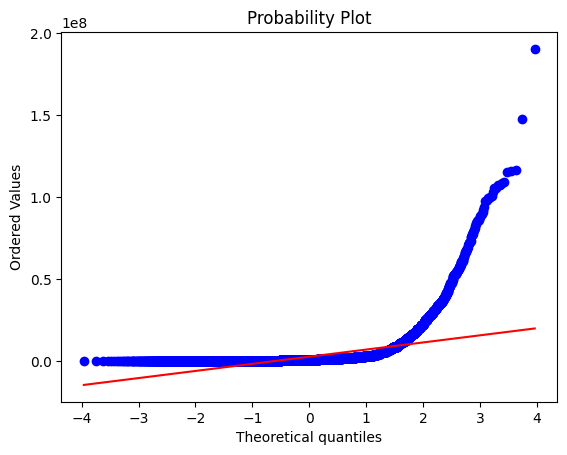

In [28]:
scipy.stats.probplot(df_limpio['Value(in Euro)'], dist="norm", plot=plt)
plt.show()

## Asimetria/Kurtosis

In [29]:
print(pd.Series(df_limpio['Overall']).skew())
print(pd.Series(df_limpio['Overall']).kurtosis())

0.10524967242893479
0.15105535992257524


## Comparación entre nacionalidades

Ahora pasaremos a comparar las nacionalidades más repetidas en el total de todos los jugadores del FIFA 23, en este caso, la nacionalidad inglesa y la alemana son las más repetidas tal y como se refleja en las tablas de arriba.

In [30]:
df_england

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
10,H. Kane,Harry Kane,89,89,105500000,ST,ST,England,https://cdn.sofifa.net/players/202/126/23_60.png,28,...,86,84,86,69,71,69,66,64,66,23
38,T. Alexander-Arnold,Trent Alexander-Arnold,87,90,100500000,RB,CM,England,https://cdn.sofifa.net/players/231/281/23_60.png,23,...,86,88,86,87,87,87,86,81,86,22
47,R. Sterling,Raheem Sterling,86,86,72500000,"LW,RW",LW,England,https://cdn.sofifa.net/players/202/652/23_60.png,27,...,86,80,86,71,67,71,68,58,68,24
69,K. Walker,Kyle Walker,85,85,37500000,RB,RB,England,https://cdn.sofifa.net/players/188/377/23_60.png,32,...,81,81,81,85,84,85,85,84,85,22
81,J. Vardy,Jamie Vardy,85,85,23000000,ST,ST,England,https://cdn.sofifa.net/players/208/830/23_60.png,35,...,82,76,82,70,68,70,69,66,69,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18417,A. Lomax,Arthur Lomax,50,60,100000,RM,ST,England,https://cdn.sofifa.net/players/269/395/23_60.png,18,...,51,43,51,39,34,39,38,32,38,16
18419,C. Rooney,Cameron Rooney,50,62,110000,CM,CAM,England,https://cdn.sofifa.net/players/271/677/23_60.png,17,...,53,52,53,51,49,51,51,47,51,16
18434,J. Ellis,Jack Ellis,50,63,100000,CB,CB,England,https://cdn.sofifa.net/players/266/821/23_60.png,18,...,35,35,35,46,45,46,49,52,49,17
18439,S. Tinubu,Sam Tinubu,50,63,100000,CDM,CDM,England,https://cdn.sofifa.net/players/264/783/23_60.png,17,...,53,50,53,54,51,54,54,54,54,17


In [31]:
df_germany

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
17,J. Kimmich,Joshua Kimmich,89,90,105500000,"CDM,RB",CDM,Germany,https://cdn.sofifa.net/players/212/622/23_60.png,27,...,86,89,86,87,89,87,86,84,86,24
27,M. ter Stegen,Marc-André ter Stegen,88,89,68500000,GK,GK,Germany,https://cdn.sofifa.net/players/192/448/23_60.png,30,...,42,48,42,36,44,36,34,36,34,89
28,T. Kroos,Toni Kroos,88,88,72000000,CM,CM,Germany,https://cdn.sofifa.net/players/182/521/23_60.png,32,...,84,88,84,80,84,80,77,74,77,22
30,A. Rüdiger,Antonio Rüdiger,87,88,73500000,CB,CB,Germany,https://cdn.sofifa.net/players/205/452/23_60.png,29,...,71,74,71,81,83,81,83,88,83,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18215,M. Lutz,Marc Lutz,51,60,120000,CB,CB,Germany,https://cdn.sofifa.net/players/271/753/23_60.png,21,...,41,42,41,49,49,49,50,53,50,17
18268,L. Kugland,Leon Kugland,51,62,130000,LB,LB,Germany,https://cdn.sofifa.net/players/268/278/23_60.png,22,...,47,45,47,51,50,51,51,49,51,15
18306,A. Rühlemann,Arne Rühlemann,51,68,150000,CM,CAM,Germany,https://cdn.sofifa.net/players/270/006/23_60.png,17,...,53,53,53,52,52,52,52,49,52,16
18358,F. Butscher,Florian Butscher,50,64,110000,CM,CAM,Germany,https://cdn.sofifa.net/players/271/752/23_60.png,19,...,52,52,52,51,51,51,51,49,51,18


## Medias

In [32]:
# Media de ataque de tipo normal 
over_germany = df_germany['Overall'].mean()
over_england = df_england['Overall'].mean()

print(over_germany)
print(over_england)

65.71760797342192
64.1109068627451


## Funciones de densidad

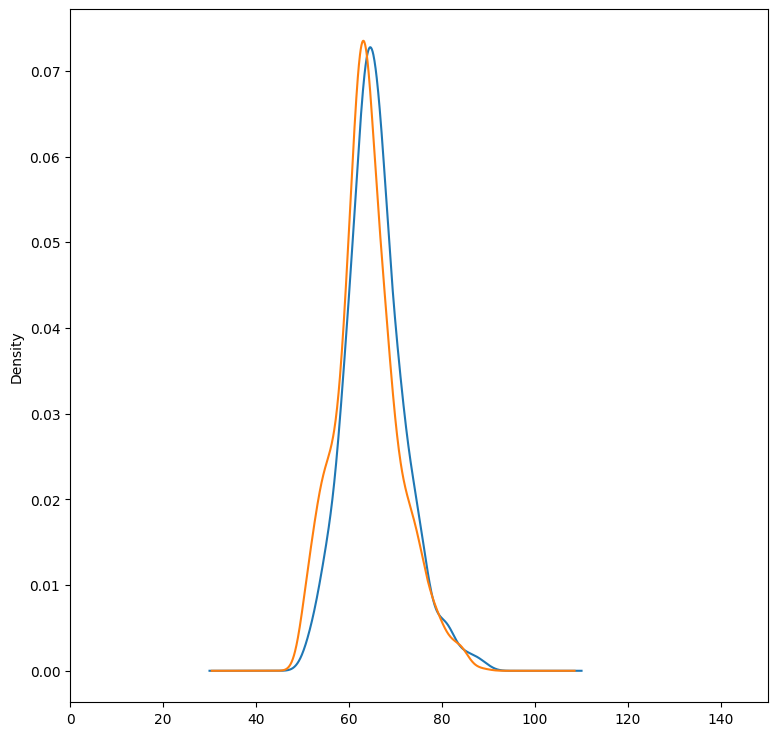

In [33]:
df_germany['Overall'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));  

df_england['Overall'].plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(0,150));   

## Standard Derivation and Varianza

In [34]:
import math

england_std = df_england['Overall'].std(ddof=1)
germany_std = df_germany['Overall'].std(ddof=1)

print(england_std)
print(germany_std)

sigma_england = england_std/math.sqrt(df_england.shape[0])
sigma_germany = germany_std/math.sqrt(df_germany.shape[0])

print(sigma_england)
print(sigma_germany)

6.714412779136733
6.334535479663191
0.1662064828948355
0.18255827755426815


## Intervalo de confianza

### Intervalo de confianza para Inglaterra


In [35]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= df_england.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = over_england,                # Sample mean
                 scale = sigma_england)             # Standard deviation estimate

C:\Users\dario\AppData\Local\Temp\ipykernel_10776\3647771161.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(63.78490622035928, 64.4369075051309)

### Intervalo de confianza para Alemania


In [36]:
scipy.stats.t.interval(alpha = 0.95,               # Confidence level
                 df= df_germany.shape[0] - 1,       # Degrees of freedom = N - 1
                 loc = over_germany,                # Sample mean
                 scale = sigma_germany)             # Standard deviation estimate

C:\Users\dario\AppData\Local\Temp\ipykernel_10776\353894334.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  scipy.stats.t.interval(alpha = 0.95,               # Confidence level


(65.35943996989404, 66.0757759769498)

In [37]:
df_limpio['Overall'].mean()

65.85204164194401

Tras observar los resultados arrojados por el intervalo de confianza podemos afirmar con una confianza del 95% que el valor de la media de los jugadores totales se encontrará dentro del rango de Alemania, pero no en el caso de Inglaterra.

<Axes: xlabel='Nationality', ylabel='Overall'>

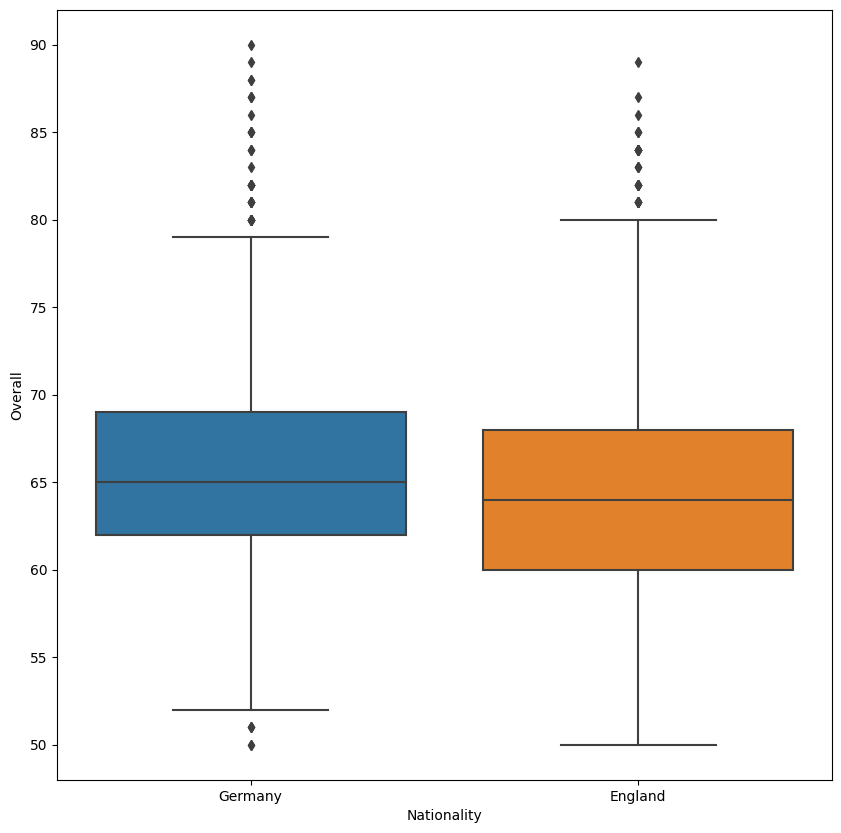

In [44]:
columnas = ['Overall', 'Nationality']

overall_germany = df_limpio[df_limpio['Nationality'] == 'Germany']
overall_england = df_limpio[df_limpio['Nationality'] == 'England']

ger_sel = overall_germany[columnas]
eng_sel = overall_england[columnas]


nuevo_df = pd.concat([ger_sel, eng_sel])

nuevo_df

plt.figure(figsize=(10,10))
sns.boxplot(x = "Nationality", y = "Overall", data = nuevo_df)
#df_limpio.boxplot('Overall')

# T-Test

### Contraste de hipotesis univariante para jugadores ingleses

In [39]:
scipy.stats.ttest_1samp(a = df_england['Overall'],               # # Sample normal type data
                 popmean = df_limpio['Overall'].mean())  # Pop mean

TtestResult(statistic=-10.475733249831121, pvalue=6.752493925903695e-25, df=1631)

### Contraste de hipotesis univariante para jugadores alemanes

In [40]:
scipy.stats.ttest_1samp(a = df_germany['Overall'],               # # Sample normal type data
                 popmean = df_limpio['Overall'].mean())  # Pop mean

TtestResult(statistic=-0.7363876912244091, pvalue=0.4616383612442445, df=1203)

### Contraste de hipotesis Bivariante para comparar medias de jugadores ingleses y alemanes

In [40]:
scipy.stats.ttest_ind(a= df_germany['Overall'],
                b= df_england['Overall'],
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-0.8339263296249347, pvalue=0.4045437595053767)

Gracias a la evidencia del contraste bivariante podemos afirmar que las medias de los jugadores ingleses no se parece a la media de los jugares alemanes

### Análisis ANOVA

<Axes: ylabel='Density'>

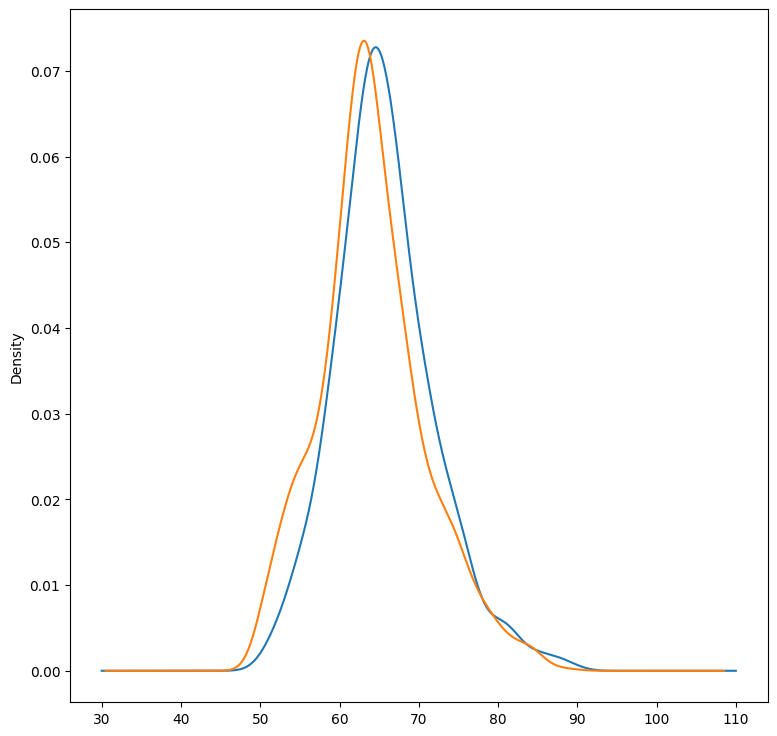

In [41]:
# Primero comprobamos la normalidad de la variable 'overall' unicamente cuando los jugadores son alemanes e ingleses

df_germany['Overall'].plot(kind = "density", figsize = (9,9))
df_england['Overall'].plot(kind = "density", figsize = (9,9))


Podemos observar que la variable 'overall' para las nacionalidades Alemania e Inglaterra se comporta como una distribución Normal, al igual que la variable 'overall' para todas las nacionalidades conjuntas

In [42]:
# Primero importamos las librerias necesarias
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#df_limpio
df_limpio = df_limpio.rename(columns={'Best Position': 'Best_Position'})
#df_germany
df_germany = df_germany.rename(columns={'Best Position': 'Best_Position'})
#df_england
df_england = df_england.rename(columns={'Best Position': 'Best_Position'})

# Ahora definimos los modelos para cada analisis ANOVA. En este caso, vamos a realizar tres modelos:
# 1- model1 --> analizaremos el 'overall' de todos los jugadores del fifa
# 2- model2 --> analizaremos el 'overall' unicamente de los jugadores alemanes
# 3- model3 --> analizaremos el 'overall' unicamente de los jugadores ingleses


model1 = ols('Overall ~ Best_Position', data= df_limpio).fit()
anova_results1 = anova_lm(model1, typ=2)
print(anova_results1)

model2 = ols('Overall ~ Best_Position', data=df_germany).fit()
anova_results2 = anova_lm(model2, typ=2)
print(anova_results2)

model3 = ols('Overall ~ Best_Position', data=df_england).fit()
anova_results3 = anova_lm(model3, typ=2)
print(anova_results3)







ModuleNotFoundError: No module named 'statsmodels'

En el primer modelo, el resultado indica que la variable "Best_Position" es significativa (p = 5.80e-17 < 0.05), lo que sugiere que la posición de juego tiene un efecto significativo en la puntuación general de los jugadores. El valor de F es 7,90, lo que indica que la variabilidad explicada por la variable "Best_Position" es mayor que la variabilidad no explicada por esta variable. Además, la suma de cuadrados de la variable "Best_Position" es 1900,47, lo que indica que la posición de juego explica una parte significativa de la variabilidad en la puntuación general de los jugadores.

Para el caso de los jugadores alemanes, el valor p es 0.063774, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa entre las posiciones de juego en términos de su efecto en la puntuación general de los jugadores. Además, el valor de F es 1.648326, lo que indica que la variabilidad explicada por la variable "Best_Position" es relativamente baja en comparación con la variabilidad no explicada por esta variable.

Por ultimo, para los jugadores ingleses, el valor p es 0.088627, lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa entre las posiciones de juego en términos de su efecto en la puntuación general de los jugadores. Además, el valor de F es 1.575638, por tanto sigue un comportamiento similar al caso de los jugadores ingleses.